In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from time import time
import tqdm
import os
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [5]:
n_trad = 7390
n_low = 8960
n_high = 2550
n_pfm = 1920
n_size = 1980

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_trad):    
    trad_pfm = np.random.normal(loc=5.00, scale=0.8)
    trad_size = np.random.normal(loc=15.00, scale=0.8)
    trad_mtbf = np.random.uniform(low=14000, high=19000)
    ax.scatter(trad_size, trad_pfm, trad_mtbf, c='red', marker='.')
    
for i in range(n_low):    
    low_size = np.random.normal(loc=18.30, scale=0.8)
    low_pfm = np.random.normal(loc=1.80, scale=0.8)
    low_mtbf = np.random.uniform(low=12000, high=17000)
    if (low_size<=19.1 or low_pfm>=0.2):
        ax.scatter(low_size, low_pfm, low_mtbf, c='blue', marker='.')
        
for i in range(n_high):    
    high_size = np.random.normal(loc=11.10, scale=0.8)
    high_pfm = np.random.normal(loc=9.0, scale=0.8)
    high_mtbf = np.random.uniform(low=20000, high=25000)
    if (low_size<=10.3 or low_pfm<=9.8):
        ax.scatter(high_size, high_pfm, high_mtbf, c='green', marker='.')
    
    
    
ax.set_xlabel('size')
ax.set_ylabel('Performance')
ax.set_zlabel('MTBF')
plt.show()

KeyboardInterrupt: 

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

In [6]:
trad_pfm = list()
trad_size = list()

low_pfm = list()
low_size = list()

high_pfm = list()
high_size = list()

for i in range(n_trad):    
    x = np.random.normal(loc=5.00, scale=0.8)
    y = np.random.normal(loc=15.00, scale=0.8)
    trad_pfm.append(x)
    trad_size.append(y)
    #z = np.random.uniform(low=14000, high=19000)
    #ax.scatter(trad_size, trad_pfm, trad_mtbf, c='red', marker='.')
    
for i in range(n_low):    
    x = np.random.normal(loc=18.30, scale=0.8)
    y = np.random.normal(loc=1.80, scale=0.8)
    #z = np.random.uniform(low=12000, high=17000)
    if (x<=19.9 and y>=0.2):
        #ax.scatter(low_size, low_pfm, low_mtbf, c='blue', marker='.')
        low_size.append(x)
        low_pfm.append(y)
        
for i in range(n_high):    
    x = np.random.normal(loc=11.10, scale=0.8)
    y = np.random.normal(loc=9.0, scale=0.8)
    #z = np.random.uniform(low=20000, high=25000)
    if (float((x-12.5)**2 + (y-7.5)**2) <= 5.76):
        #ax.scatter(high_size, high_pfm, high_mtbf, c='green', marker='.')
        high_size.append(x)
        high_pfm.append(y)
        

trad_df = {'Performance':Series(trad_pfm), 'Size':Series(trad_size)}
low_df = {'Performance':Series(low_pfm), 'Size':Series(low_size)}
high_df = {'Performance':Series(high_pfm), 'Size':Series(high_size)}

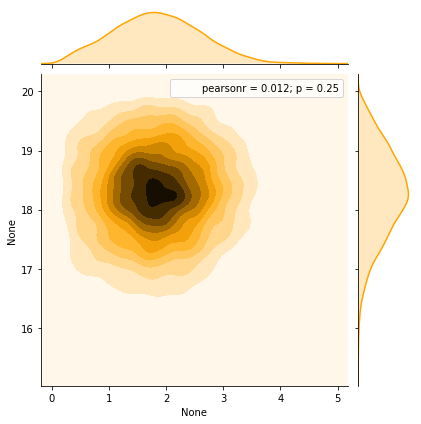

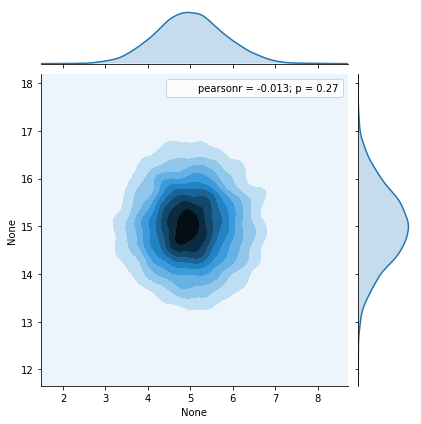

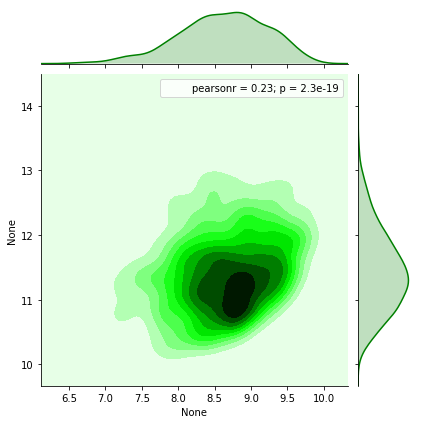

In [144]:
sns.jointplot('Performance', 'Size', data=low_df, color='orange', kind='kde')
sns.jointplot('Performance', 'Size', data=trad_df, kind='kde')
sns.jointplot('Performance', 'Size', data=high_df, color='green', kind='kde')
plt.show()

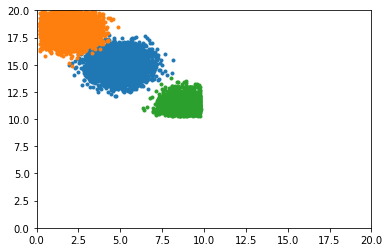

In [82]:
plt.scatter(x=trad_pfm, y=trad_size, marker='.')
plt.scatter(x=low_pfm, y=low_size, marker='.')
plt.scatter(x=high_pfm, y=high_size, marker='.')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [7]:
drifts = pd.read_csv('drifts.csv')
drifts

,trad_pfm,trad_size,low_pfm,low_size,high_pfm,high_size,pfm_pfm,pfm_size,size_pfm,size_size
0,5.0,15.0,2.5,17.5,7.5,12.5,8.0,17.0,3.0,12.0
1,5.7,14.3,3.0,17.0,8.4,11.6,9.0,16.3,3.7,11.0
2,6.4,13.6,3.5,16.5,9.3,10.7,10.0,15.6,4.4,10.0
3,7.1,12.9,4.0,16.0,10.2,9.8,11.0,14.9,5.1,9.0
4,7.8,12.2,4.5,15.5,11.1,8.9,12.0,14.2,5.8,8.0
5,8.5,11.5,5.0,15.0,12.0,8.0,13.0,13.5,6.5,7.0
6,9.2,10.8,5.5,14.5,12.9,7.1,14.0,12.8,7.2,6.0
7,9.9,10.1,6.0,14.0,13.8,6.2,15.0,12.1,7.9,5.0
8,10.6,9.4,6.5,13.5,14.7,5.3,16.0,11.4,8.6,4.0


In [8]:
def get_plots(sim_round):
    
    n_trad = 7387*(1.067**sim_round)
    n_low = 8960*(1.1380**sim_round)
    n_high = 2554*(1.202**sim_round)
    n_pfm = 1915*(1.1690**sim_round)
    n_size = 1984*(1.1590**sim_round)
    
    trad_pfm = list()
    trad_size = list()

    low_pfm = list()
    low_size = list()

    high_pfm = list()
    high_size = list()
    
    pfm_pfm = list()
    pfm_size = list()
    
    size_pfm = list()
    size_size = list()
    
    h_trad_pfm = drifts[sim_round:sim_round+1]['trad_pfm']
    h_trad_size = drifts[sim_round:sim_round+1]['trad_size']
    center_trad_pfm = h_trad_pfm + 0
    center_trad_size = h_trad_size + 0
    
    h_low_pfm = drifts[sim_round:sim_round+1]['low_pfm']
    h_low_size = drifts[sim_round:sim_round+1]['low_size']
    center_low_pfm = h_low_pfm - 0.8
    center_low_size = h_low_size + 0.8
    print h_low_pfm[0]
    print h_low_size[0]
    
    h_high_pfm = drifts[sim_round:sim_round+1]['high_pfm']
    h_high_size = drifts[sim_round:sim_round+1]['high_size']
    center_high_pfm = h_high_pfm + 1.4
    center_high_size = h_high_size - 1.4
    
    h_pfm_pfm = drifts[sim_round:sim_round+1]['pfm_pfm']
    h_pfm_size = drifts[sim_round:sim_round+1]['pfm_size']
    center_pfm_pfm = h_pfm_pfm + 1.4
    center_pfm_size = h_pfm_size - 1.0
    
    h_size_pfm = drifts[sim_round:sim_round+1]['size_pfm']
    h_size_size = drifts[sim_round:sim_round+1]['size_size']
    center_size_pfm = h_size_pfm + 1.0
    center_size_size = h_size_size - 1.4
    
    a,b,c,d,e = 0,0,0,0,0
    
    while (a <= int(n_trad)):    
        x = np.random.normal(loc=center_trad_pfm, scale=0.8)
        y = np.random.normal(loc=center_trad_size, scale=0.8)
        x = x[0]
        y = y[0]
        trad_pfm.append(x)
        trad_size.append(y)
        a=a+1
    
    while (b <= int(n_low)):    
        x = np.random.normal(loc=center_low_pfm, scale=0.8)
        y = np.random.normal(loc=center_low_size, scale=0.8)
        x = x[0]
        y = y[0]
        #if (x>=float(center_low_pfm-1.6) and y<=float(center_low_size+1.6)):
        if (float((x-h_low_pfm)**2 + (y-h_low_size)**2) <= 5.76):
            low_pfm.append(x)
            low_size.append(y)
            b=b+1
        
    while (c <= int(n_high)):    
        x = np.random.normal(loc=center_high_pfm, scale=0.8)
        y = np.random.normal(loc=center_high_size, scale=0.8)
        x = x[0]
        y = y[0]
        #if (x<=float(center_high_pfm+0.7) and y>=float(center_high_size-0.7)):
        if (float((x-h_high_pfm)**2 + (y-h_high_size)**2) <= 5.76):
            high_pfm.append(x)
            high_size.append(y)
            c=c+1
            
    while(d <= int(n_pfm)):    
        x = np.random.normal(loc=center_pfm_pfm, scale=0.8)
        y = np.random.normal(loc=center_pfm_size, scale=0.8)
        x = x[0]
        y = y[0]
        if (float((x-h_pfm_pfm)**2 + (y-h_pfm_size)**2) <= 5.76):
            pfm_pfm.append(x)
            pfm_size.append(y)
            d=d+1
            
    while(e <= int(n_size)):    
        x = np.random.normal(loc=center_size_pfm, scale=0.8)
        y = np.random.normal(loc=center_size_size, scale=0.8)
        x = x[0]
        y = y[0]
        if (float((x-h_size_pfm)**2 + (y-h_size_size)**2) <= 5.76):
            size_pfm.append(x)
            size_size.append(y)
            e=e+1
            
    return trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size

In [9]:
def get_plots_month(sim_round, end_month, segment):
    
    n_trad = 7387*(1.067**sim_round)
    n_low = 8960*(1.1380**sim_round)
    n_high = 2554*(1.202**sim_round)
    n_pfm = 1915*(1.1690**sim_round)
    n_size = 1984*(1.1590**sim_round)
    
    trad_pfm = list()
    trad_size = list()

    low_pfm = list()
    low_size = list()

    high_pfm = list()
    high_size = list()
    
    pfm_pfm = list()
    pfm_size = list()
    
    size_pfm = list()
    size_size = list()
    each_month = float(end_month)/12
    
    #print ((drifts['trad_pfm'][sim_round] - drifts['trad_pfm'][sim_round-1]))
    h_trad_pfm = drifts['trad_pfm'][sim_round-1] + (drifts['trad_pfm'][sim_round] -
                                                                 drifts['trad_pfm'][sim_round-1])*each_month
    h_trad_size = drifts['trad_size'][sim_round-1]+ (drifts['trad_size'][sim_round] -
                                                                 drifts['trad_size'][sim_round-1])*each_month
    center_trad_pfm = h_trad_pfm + 0
    center_trad_size = h_trad_size + 0
    
    h_low_pfm = drifts['low_pfm'][sim_round-1]+ (drifts['low_pfm'][sim_round] -
                                                                 drifts['low_pfm'][sim_round-1])*each_month
    h_low_size = drifts['low_size'][sim_round-1]+ (drifts['low_size'][sim_round] -
                                                                 drifts['low_size'][sim_round-1])*each_month
    center_low_pfm = h_low_pfm - 0.8
    center_low_size = h_low_size + 0.8
    #print center_low_pfm
    #print center_low_size
    
    h_high_pfm = drifts['high_pfm'][sim_round-1]+ (drifts['high_pfm'][sim_round] -
                                                                 drifts['high_pfm'][sim_round-1])*each_month
    h_high_size = drifts['high_size'][sim_round-1]+ (drifts['high_size'][sim_round] -
                                                                 drifts['high_size'][sim_round-1])*each_month
    center_high_pfm = h_high_pfm + 1.4
    center_high_size = h_high_size - 1.4
    
    h_pfm_pfm = drifts['pfm_pfm'][sim_round-1]+ (drifts['pfm_pfm'][sim_round] -
                                                                 drifts['pfm_pfm'][sim_round-1])*each_month
    h_pfm_size = drifts['pfm_size'][sim_round-1]+ (drifts['pfm_size'][sim_round] -
                                                                 drifts['pfm_size'][sim_round-1])*each_month
    center_pfm_pfm = h_pfm_pfm + 1.4
    center_pfm_size = h_pfm_size - 1.0
    
    h_size_pfm = drifts['size_pfm'][sim_round-1]+ (drifts['size_pfm'][sim_round] -
                                                                 drifts['size_pfm'][sim_round-1])*each_month
    h_size_size = drifts['size_size'][sim_round-1]+ (drifts['size_size'][sim_round] -
                                                                 drifts['size_size'][sim_round-1])*each_month

    center_size_pfm = h_size_pfm + 1.0
    center_size_size = h_size_size - 1.4
    
    if (segment == 'trad'):
        print "Performance: ", center_trad_pfm
        print "Size: ", center_trad_size
    elif (segment=='low'):
        print "Performance: ", center_low_pfm
        print "Size: ", center_low_size
    elif (segment=='high'):
        print "Performance: ", center_high_pfm
        print "Size: ", center_high_size
    elif (segment=='pfm'):
        print "Performance: ", center_pfm_pfm
        print "Size: ", center_pfm_size
    elif (segment=='size'):
        print "Performance: ", center_size_pfm
        print "Size: ", center_size_size
    
    a,b,c,d,e = 0,0,0,0,0
    
    while (a <= int(n_trad)):    
        x = np.random.normal(loc=center_trad_pfm, scale=0.8)
        y = np.random.normal(loc=center_trad_size, scale=0.8)
        #x = x[0]
        #y = y[0]
        trad_pfm.append(x)
        trad_size.append(y)
        a=a+1
    
    while (b <= int(n_low)):    
        x = np.random.normal(loc=center_low_pfm, scale=0.8)
        y = np.random.normal(loc=center_low_size, scale=0.8)
        #x = x[0]
        #y = y[0]
        #if (x>=float(center_low_pfm-1.6) and y<=float(center_low_size+1.6)):
        if (float((x-h_low_pfm)**2 + (y-h_low_size)**2) <= 5.76):
            low_pfm.append(x)
            low_size.append(y)
            b=b+1
        
    while (c <= int(n_high)):    
        x = np.random.normal(loc=center_high_pfm, scale=0.8)
        y = np.random.normal(loc=center_high_size, scale=0.8)
        #x = x[0]
        #y = y[0]
        #if (x<=float(center_high_pfm+0.7) and y>=float(center_high_size-0.7)):
        if (float((x-h_high_pfm)**2 + (y-h_high_size)**2) <= 5.76):
            high_pfm.append(x)
            high_size.append(y)
            c=c+1
            
    while(d <= int(n_pfm)):    
        x = np.random.normal(loc=center_pfm_pfm, scale=0.8)
        y = np.random.normal(loc=center_pfm_size, scale=0.8)
        #x = x[0]
        #y = y[0]
        if (float((x-h_pfm_pfm)**2 + (y-h_pfm_size)**2) <= 5.76):
            pfm_pfm.append(x)
            pfm_size.append(y)
            d=d+1
            
    while(e <= int(n_size)):    
        x = np.random.normal(loc=center_size_pfm, scale=0.8)
        y = np.random.normal(loc=center_size_size, scale=0.8)
        #x = x[0]
        #y = y[0]
        if (float((x-h_size_pfm)**2 + (y-h_size_size)**2) <= 5.76):
            size_pfm.append(x)
            size_size.append(y)
            e=e+1
            
    return trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size

In [7]:
def get_plots2(sim_round, trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size):
    plt.scatter(x=trad_pfm, y=trad_size, marker='.')
    plt.scatter(x=low_pfm, y=low_size, marker='.')
    plt.scatter(x=high_pfm, y=high_size, marker='.')
    plt.scatter(x=pfm_pfm, y=pfm_size, marker='.')
    plt.scatter(x=size_pfm, y=size_size, marker='.')
    plt.xlabel('Performance')
    plt.ylabel('Size')
    plt.title('Round: '+ str(sim_round))
    plt.xlim(0,20)
    plt.ylim(0,20)
    plt.show()

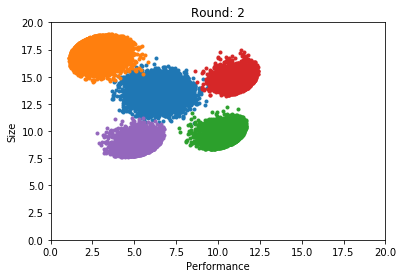

In [32]:
round_sim = 2
trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size = get_plots(round_sim)
get_plots2(round_sim, trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size)

In [33]:
trad_df = {'Performance':Series(trad_pfm), 'Size':Series(trad_size)}
low_df = {'Performance':Series(low_pfm), 'Size':Series(low_size)}
high_df = {'Performance':Series(high_pfm), 'Size':Series(high_size)}
pfm_df = {'Performance':Series(pfm_pfm), 'Size':Series(pfm_size)}
size_df = {'Performance':Series(size_pfm), 'Size':Series(size_size)}

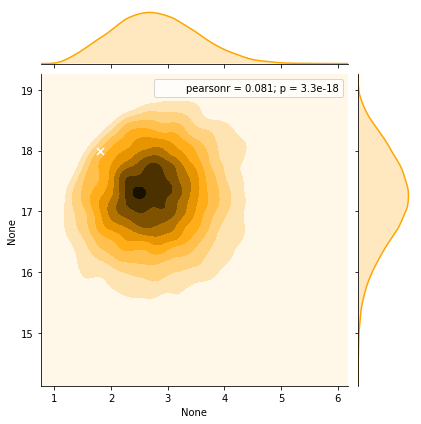

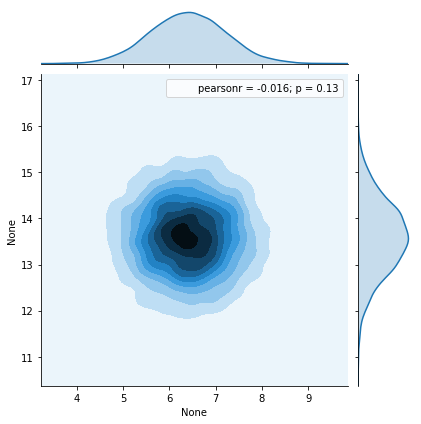

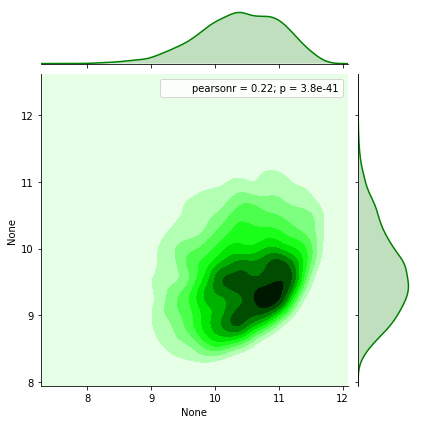

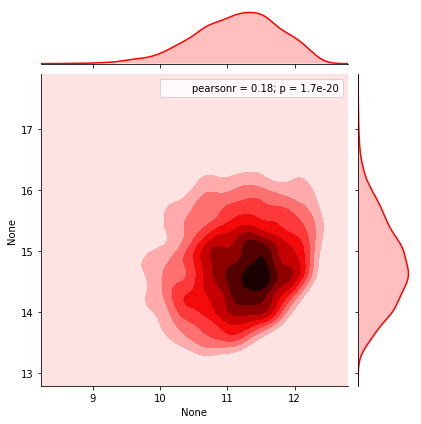

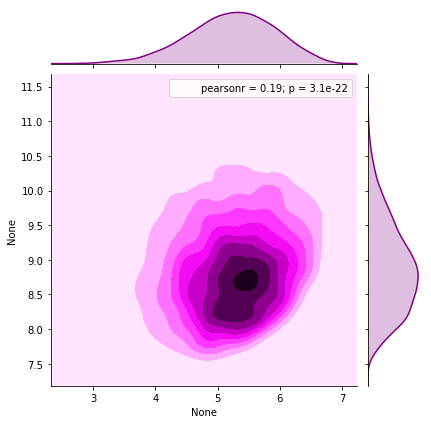

In [34]:
graph = sns.jointplot('Performance', 'Size', data=low_df, color='orange', kind='kde')
graph.x = 1.8
graph.y = 18
graph.plot_joint(plt.scatter, marker='x', c='w', s=50)
sns.jointplot('Performance', 'Size', data=trad_df, kind='kde')
sns.jointplot('Performance', 'Size', data=high_df, color='green', kind='kde')
sns.jointplot('Performance', 'Size', data=pfm_df, color='red', kind='kde')
sns.jointplot('Performance', 'Size', data=size_df, color='purple', kind='kde')
plt.show()

Month:0
6.4
13.6


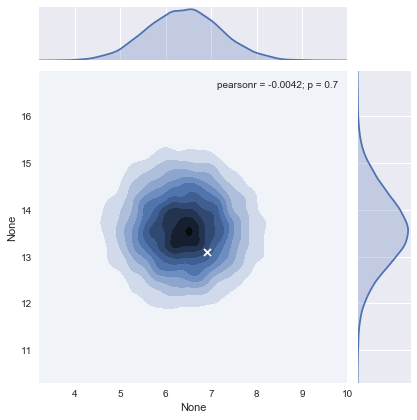

Month:1
6.45833333333
13.5416666667


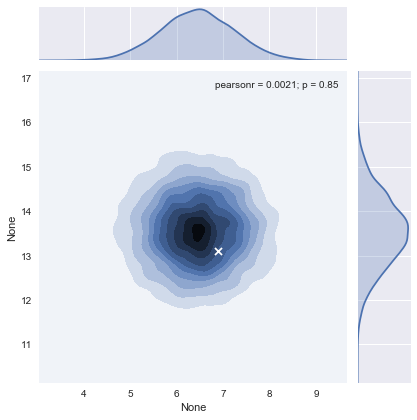

Month:2
6.51666666667
13.4833333333


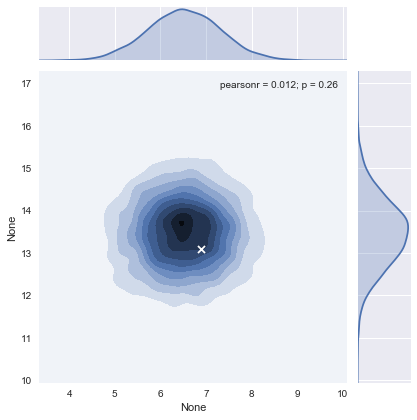

Month:3
6.575
13.425


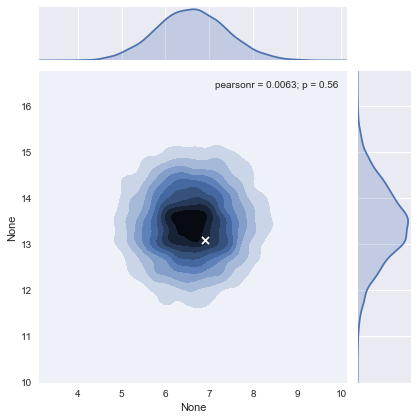

Month:4
6.63333333333
13.3666666667


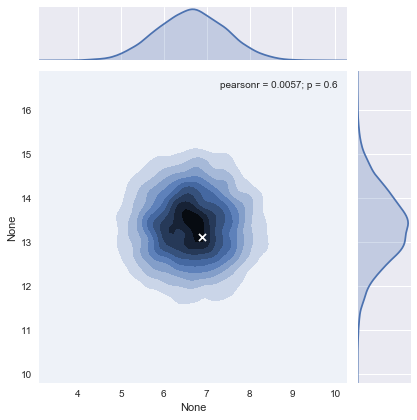

Month:5
6.69166666667
13.3083333333


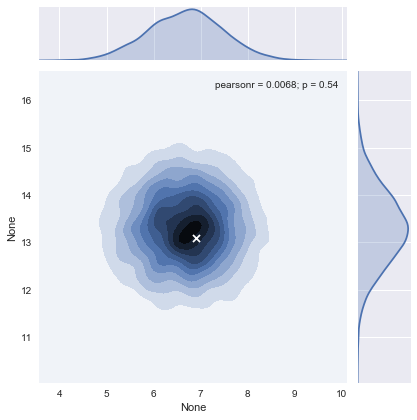

Month:6
6.75
13.25


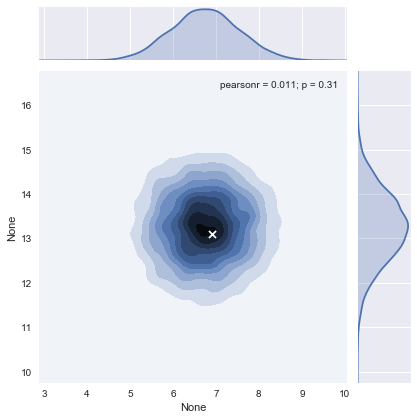

Month:7
6.80833333333
13.1916666667


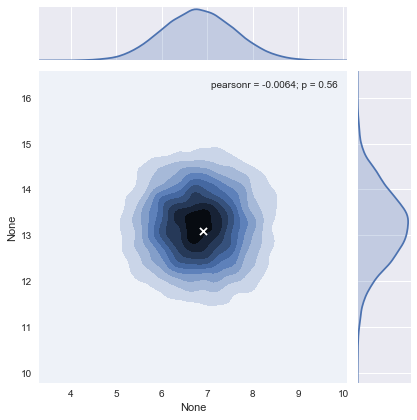

Month:8
6.86666666667
13.1333333333


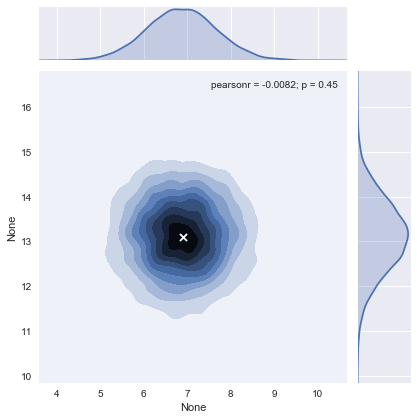

Month:9
6.925
13.075


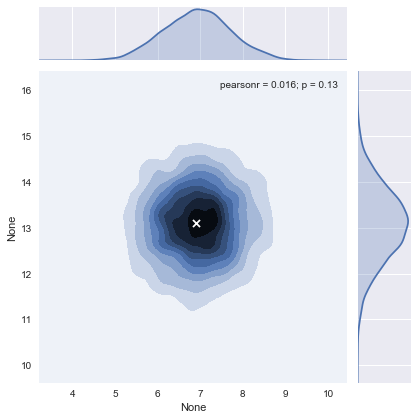

Month:10
6.98333333333
13.0166666667


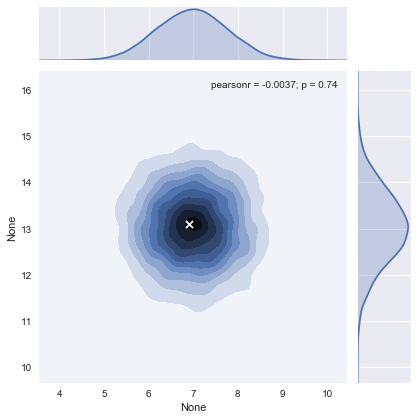

Month:11
7.04166666667
12.9583333333


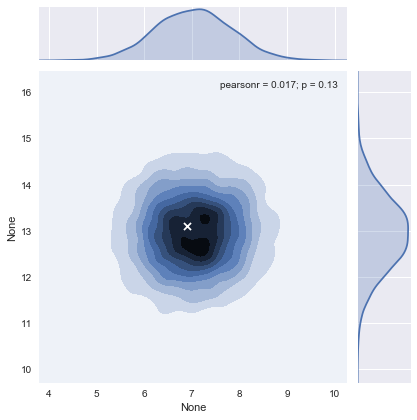

Month:12
7.1
12.9


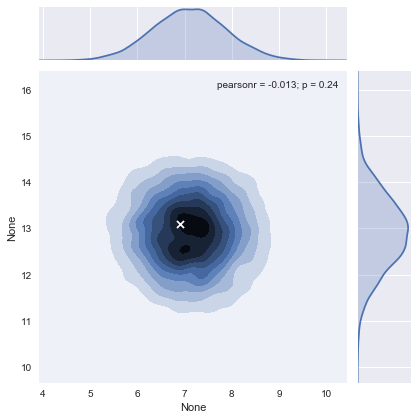

In [11]:
sns.set(style="darkgrid")
round_sim=2
for i in range(13):
    print "Month:" + str(i)
    trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size = get_plots_month(round_sim, i)
    trad_df = {'Performance':Series(trad_pfm), 'Size':Series(trad_size)}
    graph = sns.jointplot('Performance', 'Size', data=trad_df, kind='kde')
    graph.x = [6.9]
    graph.y = [13.1]
    graph.plot_joint(plt.scatter, marker='x', c='w', s=50)
    plt.show()

In [23]:
drifts['high_pfm']

0     7.5
1     8.4
2     9.3
3    10.2
4    11.1
5    12.0
6    12.9
7    13.8
8    14.7
Name: high_pfm, dtype: float64

Month:0
Performance:  10.7
Size:  9.3


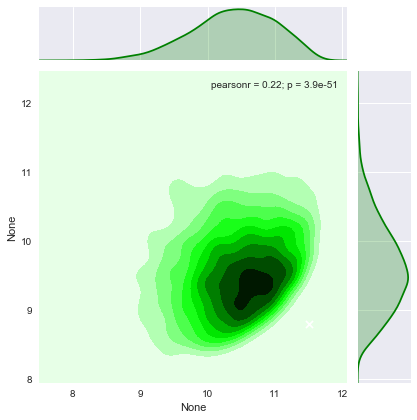

Month:1
Performance:  10.775
Size:  9.225


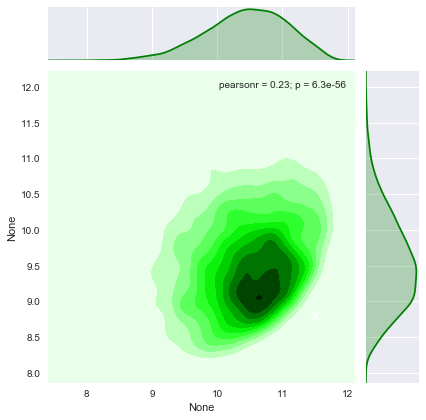

Month:2
Performance:  10.85
Size:  9.15


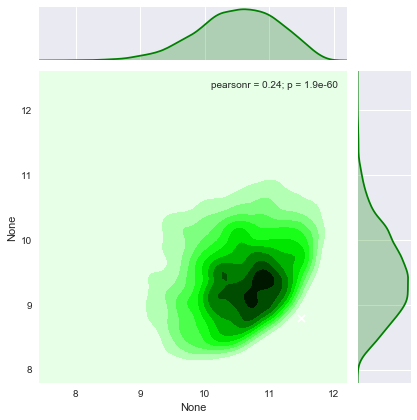

Month:3
Performance:  10.925
Size:  9.075


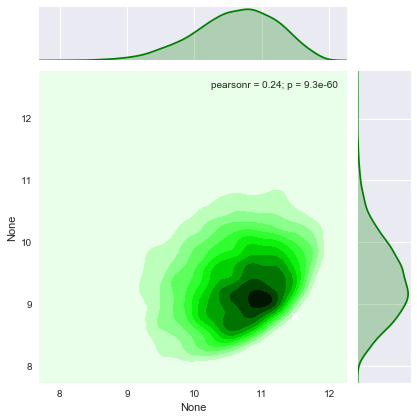

Month:4
Performance:  11.0
Size:  9.0


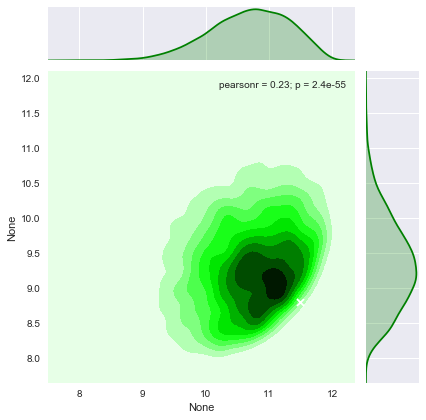

Month:5
Performance:  11.075
Size:  8.925


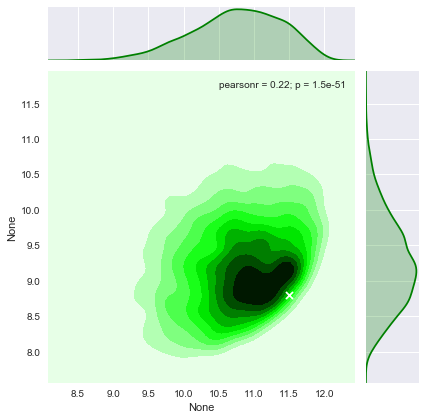

Month:6
Performance:  11.15
Size:  8.85


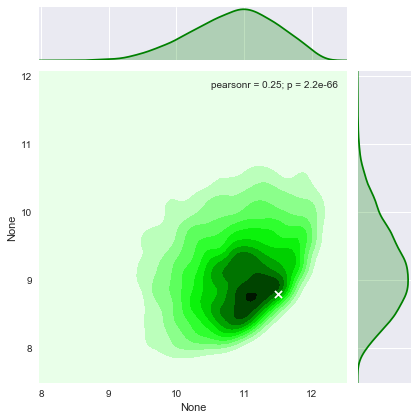

Month:7
Performance:  11.225
Size:  8.775


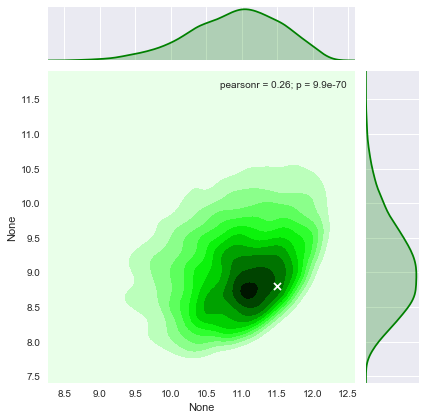

Month:8
Performance:  11.3
Size:  8.7


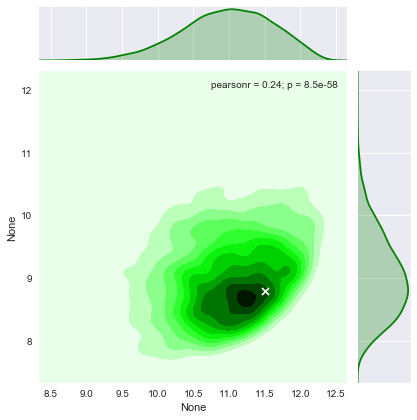

Month:9
Performance:  11.375
Size:  8.625


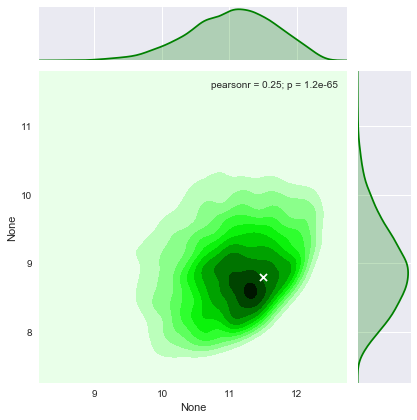

Month:10
Performance:  11.45
Size:  8.55


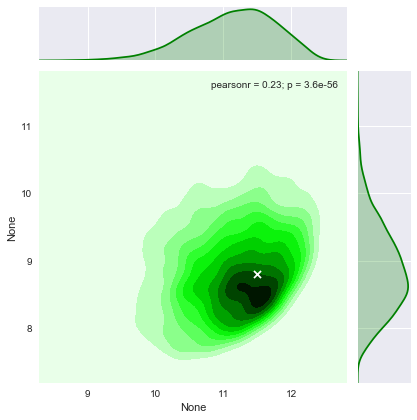

Month:11
Performance:  11.525
Size:  8.475


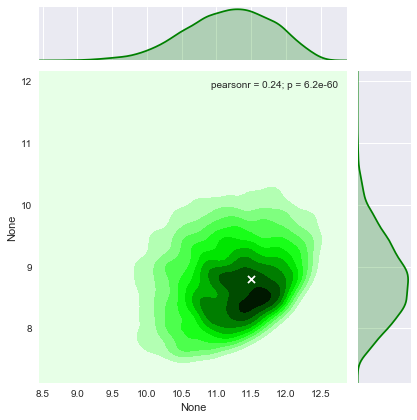

Month:12
Performance:  11.6
Size:  8.4


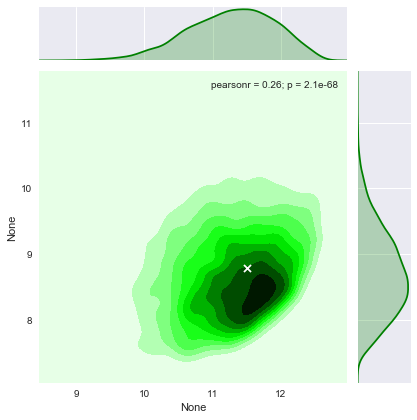

In [10]:
sns.set(style="darkgrid")
round_sim=3
for i in range(13):
    print "Month:" + str(i)
    trad_pfm, trad_size, low_pfm, low_size, high_pfm, high_size, pfm_pfm, pfm_size, size_pfm, size_size = get_plots_month(round_sim, i, 'high')
    high_df = {'Performance':Series(high_pfm), 'Size':Series(high_size)}
    graph = sns.jointplot('Performance', 'Size', data=high_df, color='green', kind='kde')
    graph.x = [11.5]
    graph.y = [8.8]
    graph.plot_joint(plt.scatter, marker='x', c='w', s=50)
    plt.show()